**CAMB Python example notebook**

Run it online yourself in [Binder](https://mybinder.org/v2/gh/cmbant/camb/master?filepath=docs%2FCAMBdemo.ipynb).

This notebook is based on the CAMBdemo notebook that can be found in the docs folder after installing CAMB, and is modified for the Heidelberg Grad Days 2022. 

Credit for the original: Antony Lewis and Anthony Challinor

In order to use this notebook, please install CAMB using the instructions in
https://github.com/cmbant/CAMB



In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

#Assume installed from github using "git clone --recursive https://github.com/cmbant/CAMB.git"
#This file is then in the docs folders
camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
sys.path.insert(0,camb_path)
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.3.5 installed at /Users/alanne/git/CAMB/camb


In [8]:
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino 
#and helium set using BBN consistency
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

In [9]:
#calculate results for these parameters
results = camb.get_results(pars)

In [10]:
#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers: print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


The letter T in the following spectra refers to the temperature fluctuations that we have considered so far, and E & B parametrise the polarisation power spectrum. 

(2551, 4)


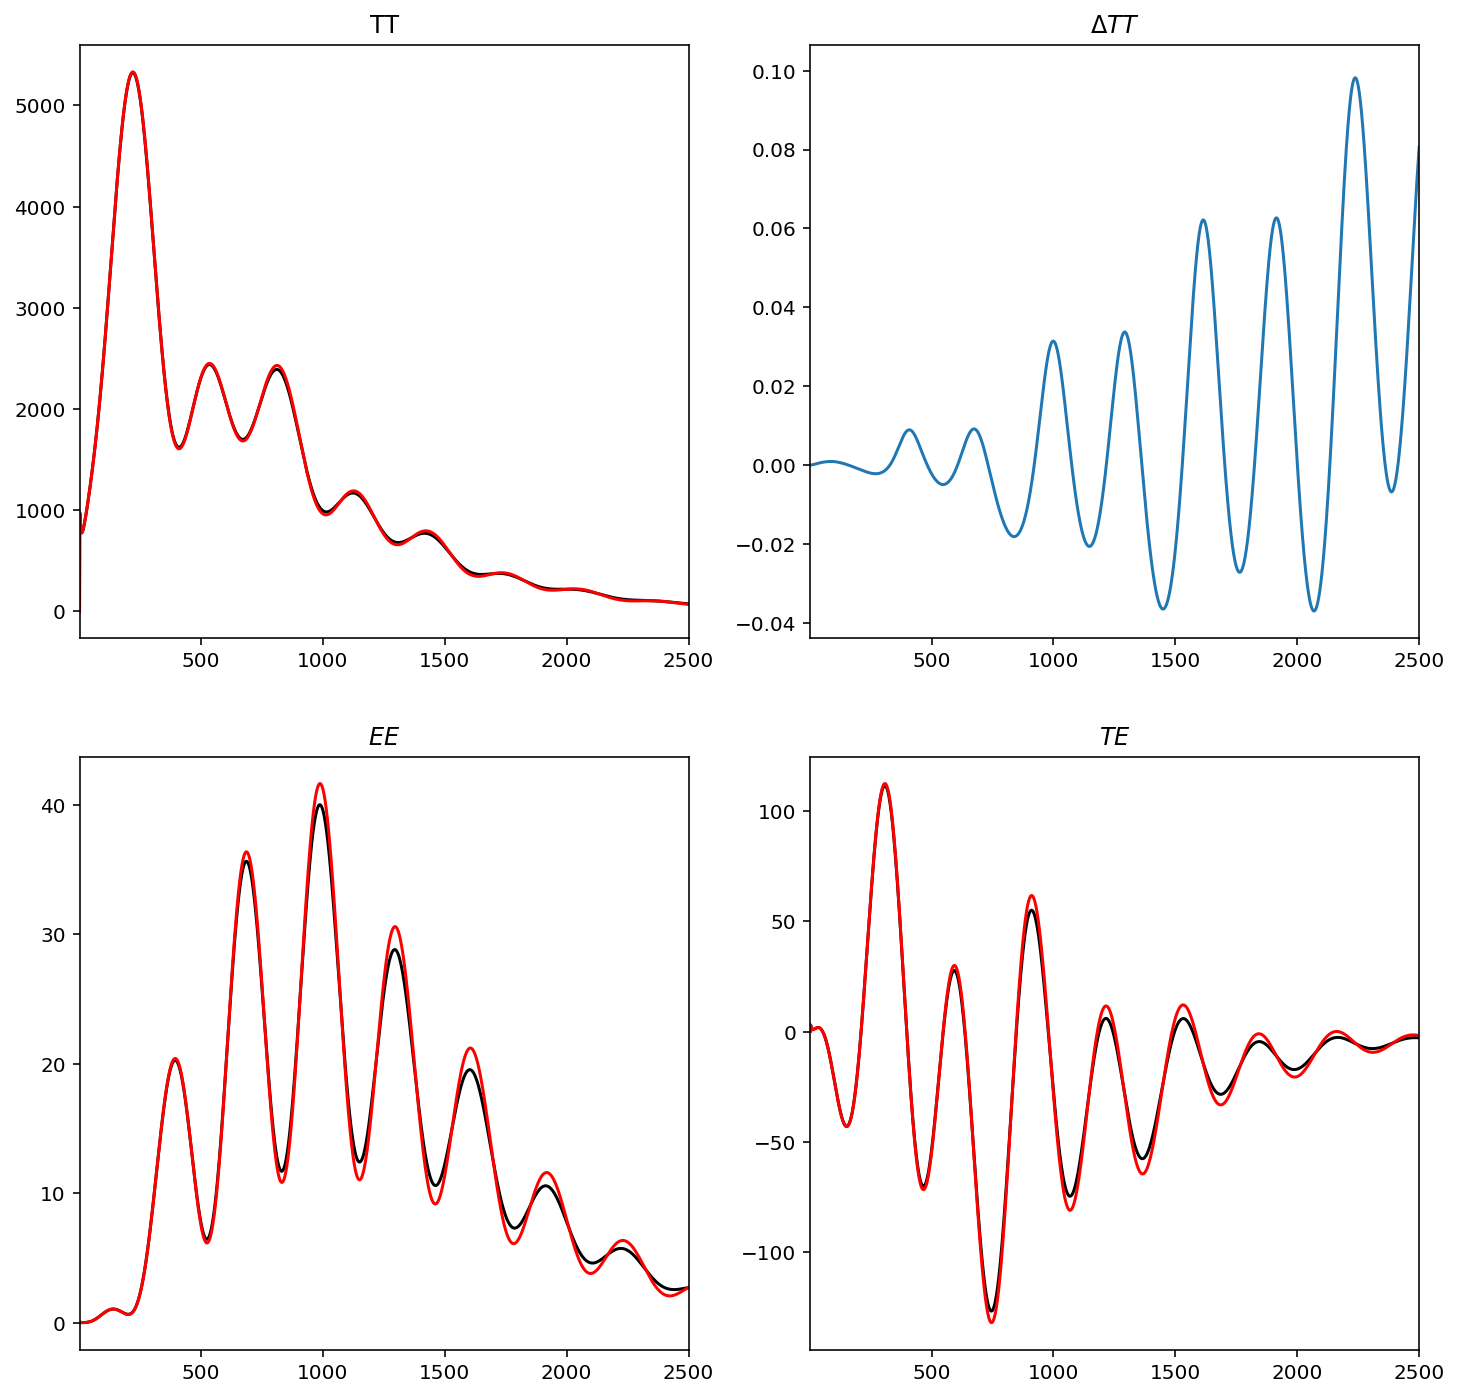

In [11]:
#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
print(totCL.shape)
#Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).
ls = np.arange(totCL.shape[0])
fig, ax = plt.subplots(2,2, figsize = (12,12))
ax[0,0].plot(ls,totCL[:,0], color='k')
ax[0,0].plot(ls,unlensedCL[:,0], color='r')
ax[0,0].set_title('TT')
ax[0,1].plot(ls[2:], 1-unlensedCL[2:,0]/totCL[2:,0]);
ax[0,1].set_title(r'$\Delta TT$')
ax[1,0].plot(ls,totCL[:,1], color='k')
ax[1,0].plot(ls,unlensedCL[:,1], color='r')
ax[1,0].set_title(r'$EE$')
ax[1,1].plot(ls,totCL[:,3], color='k')
ax[1,1].plot(ls,unlensedCL[:,3], color='r')
ax[1,1].set_title(r'$TE$');
for ax in ax.reshape(-1): ax.set_xlim([2,2500]);


In [12]:
#Now get matter power spectra and sigma8 at redshift 0 and 0.8
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
pars.InitPower.set_params(ns=0.965)
#Note non-linear corrections couples to smaller scales than you want
pars.set_matter_power(redshifts=[0., 0.8], kmax=2.0)

#Linear spectra
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)
s8 = np.array(results.get_sigma8())

#Non-Linear spectra (Halofit)
pars.NonLinear = model.NonLinear_both
results.calc_power_spectra(pars)
kh_nonlin, z_nonlin, pk_nonlin = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)


Note: redshifts have been re-sorted (earliest first)


In [13]:
print(results.get_sigma8())

[0.53298468 0.80251083]


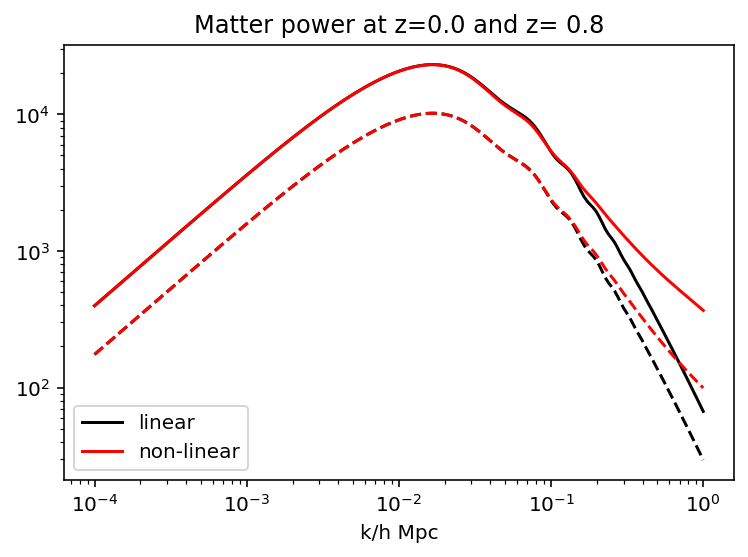

In [14]:
for i, (redshift, line) in enumerate(zip(z,['-','--'])):
    plt.loglog(kh, pk[i,:], color='k', ls = line)
    plt.loglog(kh_nonlin, pk_nonlin[i,:], color='r', ls = line)
plt.xlabel('k/h Mpc');
plt.legend(['linear','non-linear'], loc='lower left');
plt.title('Matter power at z=%s and z= %s'%tuple(z));

---
You can view the parameters (as used by fortran CAMB internals) by just printing the parameter object.
See the [docs](https://camb.readthedocs.io/en/latest/model.html) for parameter and structure descriptions

In [15]:
# parameters can also be read from text .ini files, for example this sets up a best-fit 
# Planck 2018 LCDM cosmology (base_plikHM_TTTEEE_lowl_lowE_lensing). 
# [Use planck_2018_acc.ini if you need high-ell and/or accurate BB and CMB lensng spectra at beyond-Planck accuracy]

pars=camb.read_ini(os.path.join(camb_path,'CAMB/inifiles','planck_2018.ini'))
print(pars)

class: <CAMBparams>
 WantCls = True
 WantTransfer = True
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_both
 Transfer: <TransferParams>
   high_precision = True
   accurate_massive_neutrinos = False
   kmax = 1.3464234
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 2700
 max_l_tensor = 600
 max_eta_k = 18000.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.0223828
 omch2 = 0.1201075
 omk = 0.0
 omnuh2 = 0.0006451439
 H0 = 67.32117
 TCMB = 2.7255
 YHe = 0.2454006
 num_nu_massless = 2.046
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = True
 nu_mass_degeneracies = [0.0]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_indeptilt
   ns = 0.9660499
   nrun = 0.0
   nrunrun = 0.0
 

In [16]:
#Get various background functions and derived parameters
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
results = camb.get_background(pars)
print('Derived parameter dictionary: %s'%results.get_derived_params())

Derived parameter dictionary: {'age': 13.74073863845039, 'zstar': 1090.5658475324099, 'rstar': 144.20178125795687, 'thetastar': 1.044580972633789, 'DAstar': 13.804748988904988, 'zdrag': 1059.2190342181793, 'rdrag': 146.9800313509604, 'kd': 0.14069398723263796, 'thetad': 0.16175057038026805, 'zeq': 3441.168556293452, 'keq': 0.010502750486921146, 'thetaeq': 0.8080627639840222, 'thetarseq': 0.44701547390616925}


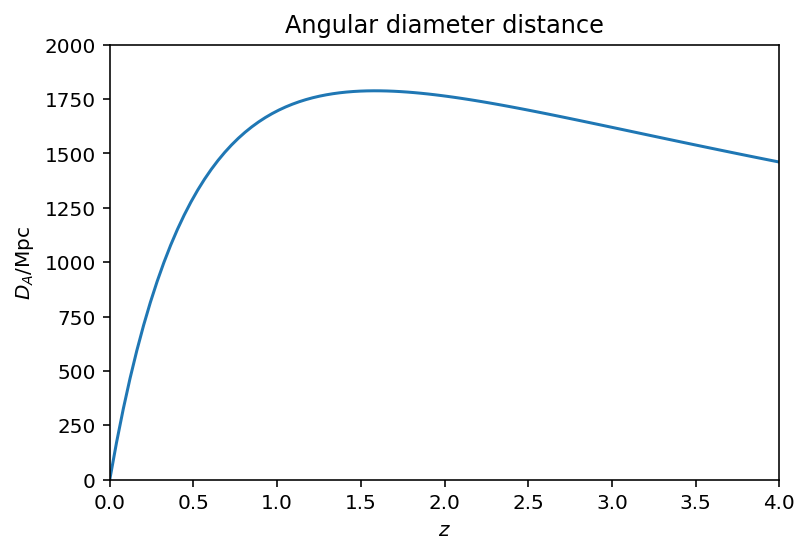

In [17]:
z = np.linspace(0,4,100)
DA = results.angular_diameter_distance(z)
plt.plot(z, DA)
plt.xlabel('$z$')
plt.ylabel(r'$D_A /\rm{Mpc}$')
plt.title('Angular diameter distance')
plt.ylim([0,2000])
plt.xlim([0,4]);

In [18]:
print('CosmoMC theta_MC parameter: %s'%results.cosmomc_theta())

CosmoMC theta_MC parameter: 0.0104434176425333


In [19]:
#You can also directly access some lower level quantities, for example the CMB transfer functions:
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
data = camb.get_transfer_functions(pars)
transfer = data.get_cmb_transfer_data()
print('Number of sources (T, E, phi..): %s; number of ell: %s; number of k: %s '%tuple(transfer.delta_p_l_k.shape))

Number of sources (T, E, phi..): 3; number of ell: 87; number of k: 2737 


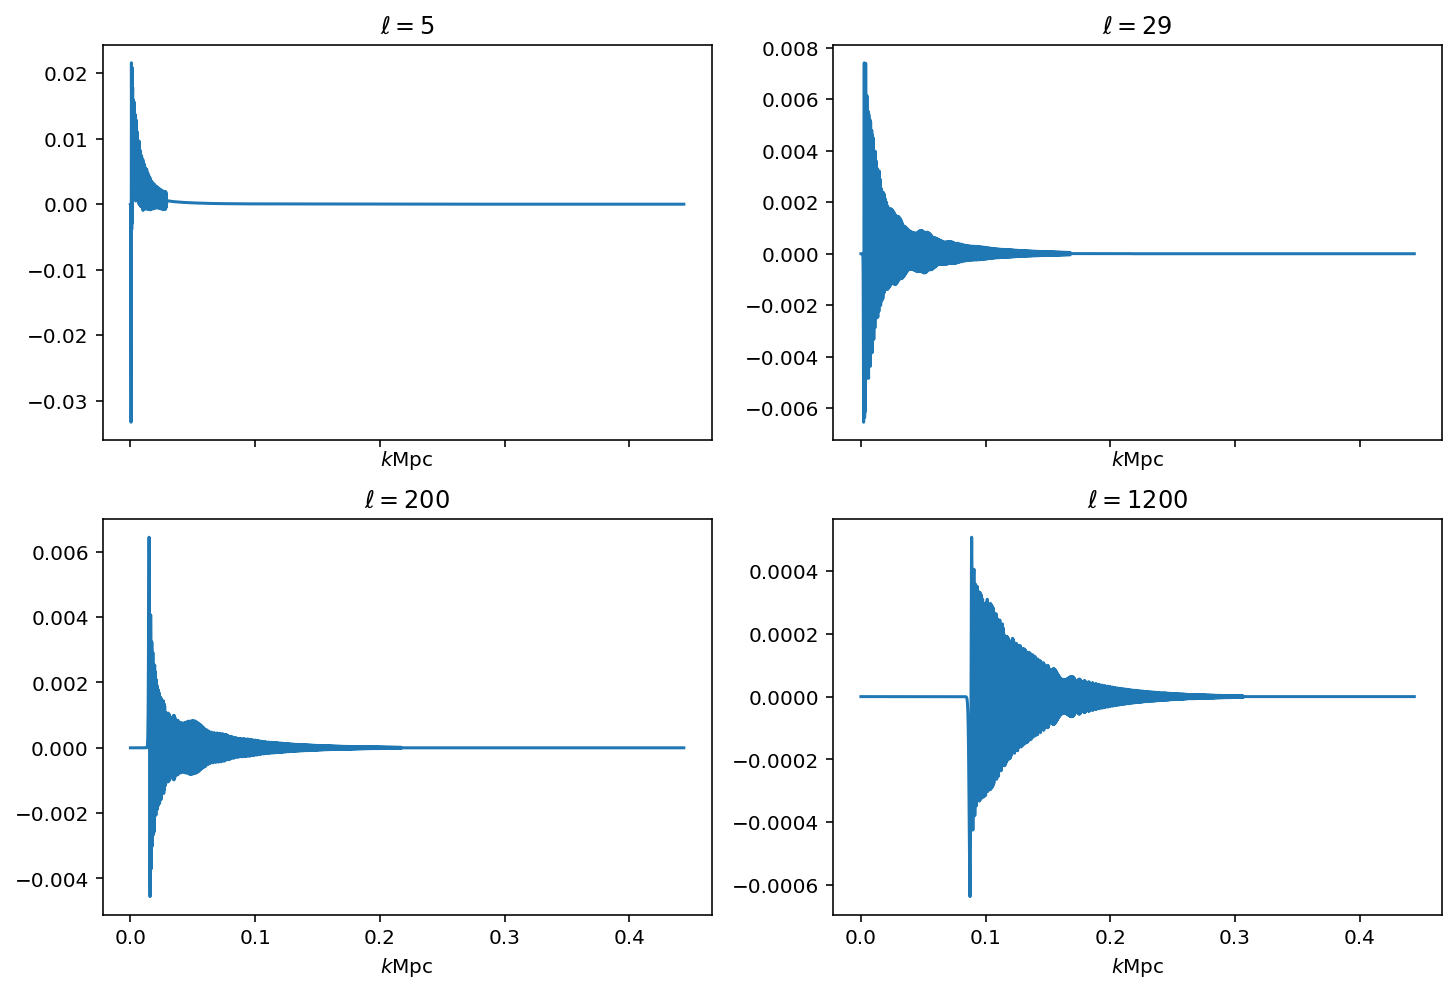

In [20]:
#Plot the transfer functions as a function of k for various ell
fig, axs = plt.subplots(2,2, figsize=(12,8), sharex = True)
for ix, ax in zip([3, 20, 40, 60],axs.reshape(-1)):
    ax.plot(transfer.q,transfer.delta_p_l_k[0,ix,:])
    ax.set_title(r'$\ell = %s$'%transfer.L[ix])
    if ix>1: ax.set_xlabel(r'$k \rm{Mpc}$')

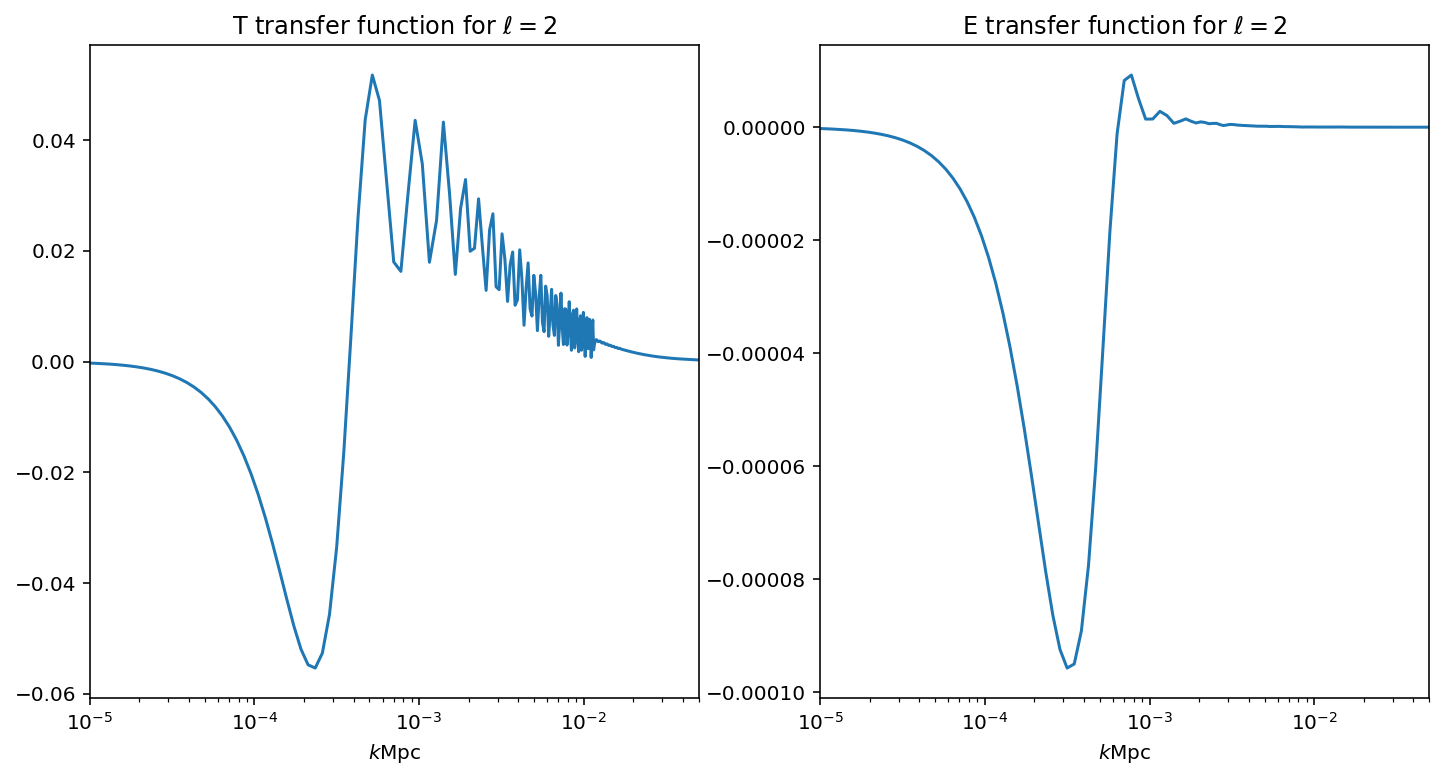

In [21]:
#Note that internal samplings can be quite sparsely sampled, e.g. look at l=2 transfer function
def plot_cmb_transfer_l(trans, ix):
    _, axs = plt.subplots(1,2, figsize=(12,6))
    for source_ix, (name, ax) in enumerate(zip(['T', 'E'], axs)):
        ax.semilogx(trans.q,trans.delta_p_l_k[source_ix,ix,:])
        ax.set_xlim([1e-5, 0.05])
        ax.set_xlabel(r'$k \rm{Mpc}$')
        ax.set_title(r'%s transfer function for $\ell = %s$'%(name, trans.L[ix]))
plot_cmb_transfer_l(transfer,0)

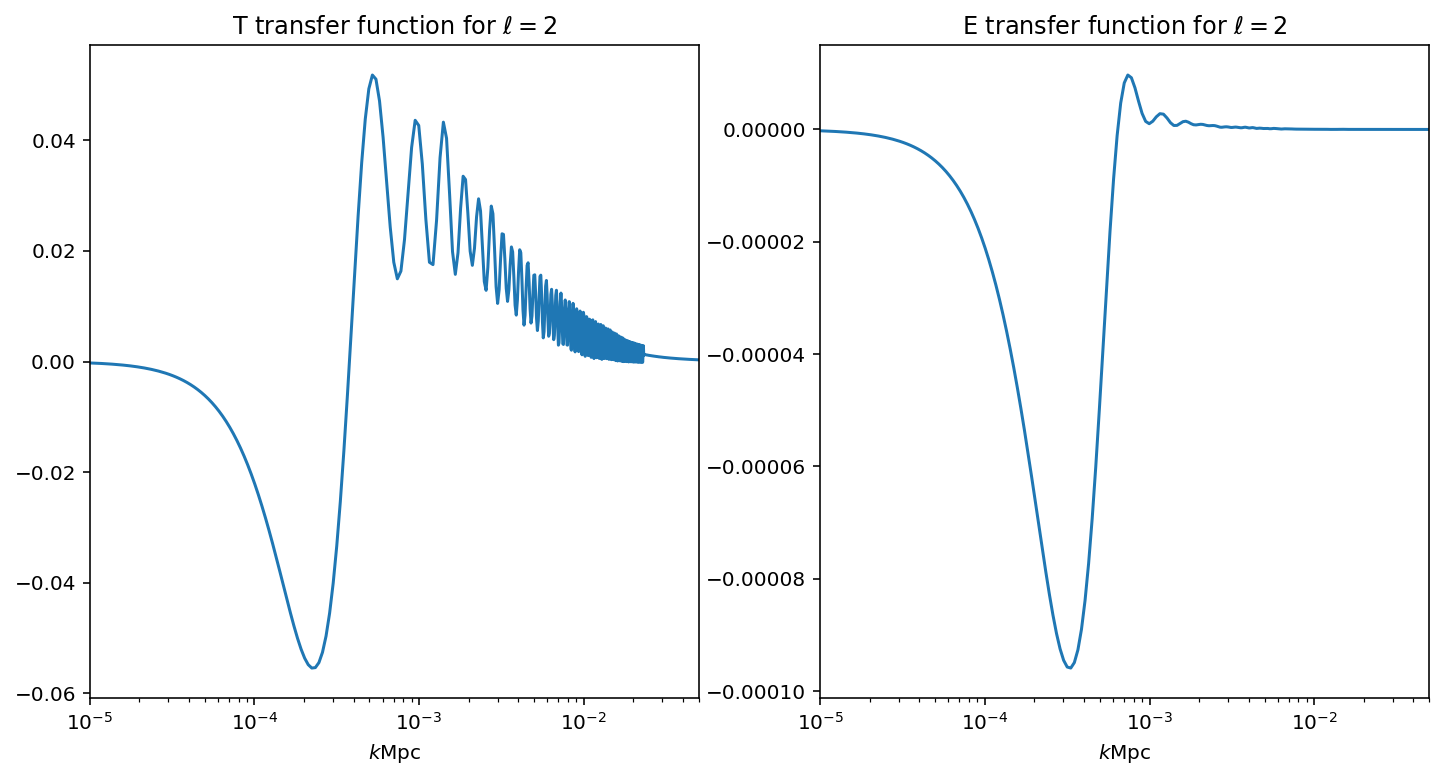

In [22]:
#So if you want to make nice plots, either interpolate or do things at higher than default accuracy
pars.set_accuracy(AccuracyBoost=2) #higher accuracy, so higher sampling density
data = camb.get_transfer_functions(pars)
plot_cmb_transfer_l(data.get_cmb_transfer_data(),0)
pars.set_accuracy(AccuracyBoost=1); #re-set default

In [23]:
#set_params is a shortcut routine for setting many things at once
pars = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, As=2e-9, ns=0.95)
data= camb.get_background(pars)

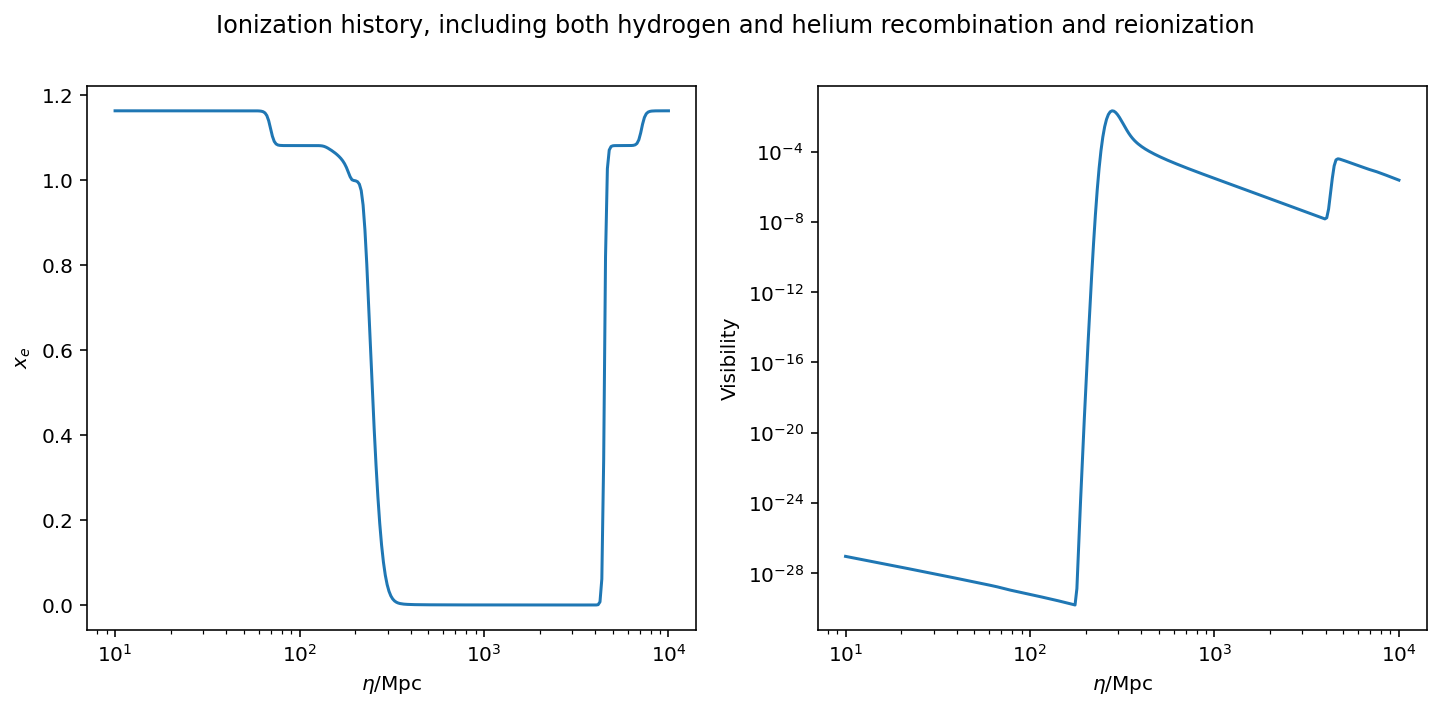

In [24]:
#There are functions get plot evolution of variables, e.g. for the background as a function of conformal time:
eta = 10**(np.linspace(1, 4,300))
back_ev = data.get_background_time_evolution(eta, ['x_e', 'visibility'])
fig, axs= plt.subplots(1,2, figsize=(12,5))
axs[0].semilogx(eta, back_ev['x_e'])
axs[1].loglog(eta, back_ev['visibility'])
axs[0].set_xlabel(r'$\eta/\rm{Mpc}$')
axs[0].set_ylabel('$x_e$')
axs[1].set_xlabel(r'$\eta/\rm{Mpc}$')
axs[1].set_ylabel('Visibility');
fig.suptitle('Ionization history, including both hydrogen and helium recombination and reionization');

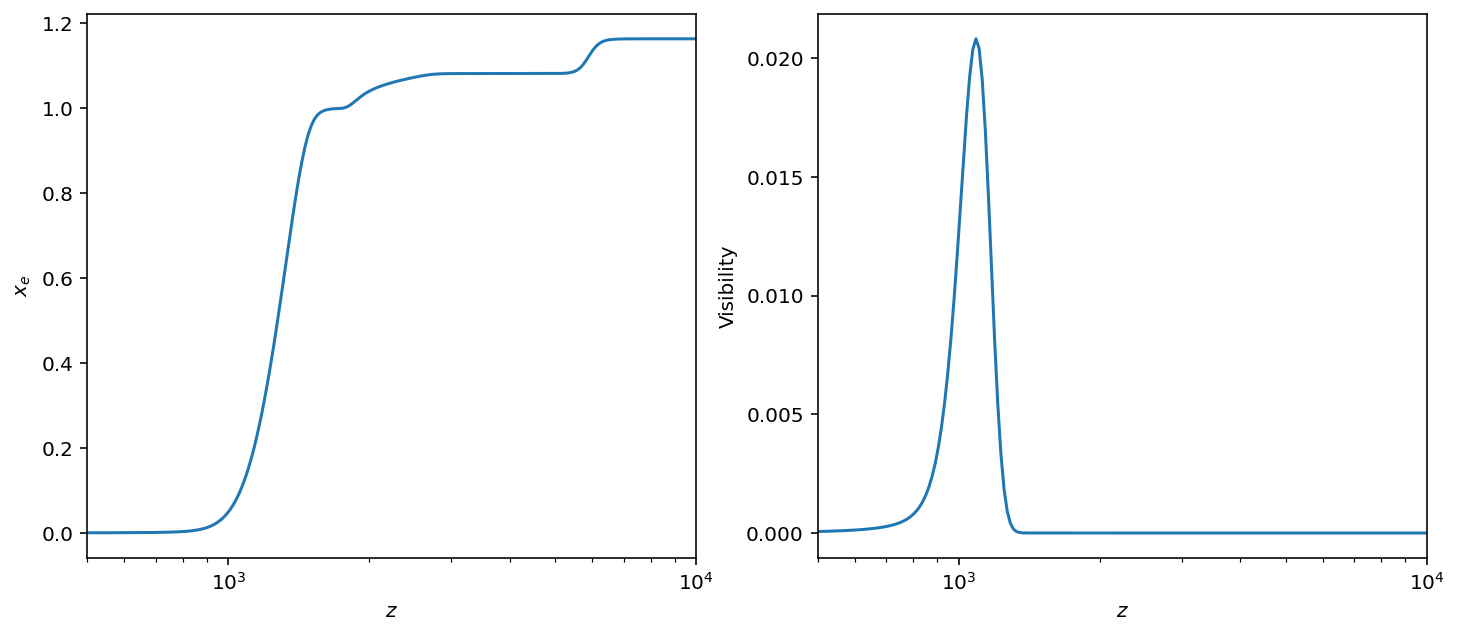

In [25]:
#or as a function of redshift
z = 10**np.linspace(2, 4, 300)
back_ev = data.get_background_redshift_evolution(z, ['x_e', 'visibility'], format='array')
fig, axs= plt.subplots(1,2, figsize=(12,5))
for i, (ax, label), in enumerate(zip(axs, ['$x_e$','Visibility'])):
    ax.semilogx(z, back_ev[:,i])
    ax.set_xlabel('$z$')
    ax.set_ylabel(label)
    ax.set_xlim([500,1e4])

In [26]:
#and perturbation transfer functions, e.g. for k=0.1. Note that quantities are synchronous gauge unless otherwise specified
print('Available variables are %s'%camb.model.evolve_names)

Available variables are ['k/h', 'delta_cdm', 'delta_baryon', 'delta_photon', 'delta_neutrino', 'delta_nu', 'delta_tot', 'delta_nonu', 'delta_tot_de', 'Weyl', 'v_newtonian_cdm', 'v_newtonian_baryon', 'v_baryon_cdm', 'a', 'etak', 'H', 'growth', 'v_photon', 'pi_photon', 'E_2', 'v_neutrino', 'T_source', 'E_source', 'lens_potential_source']


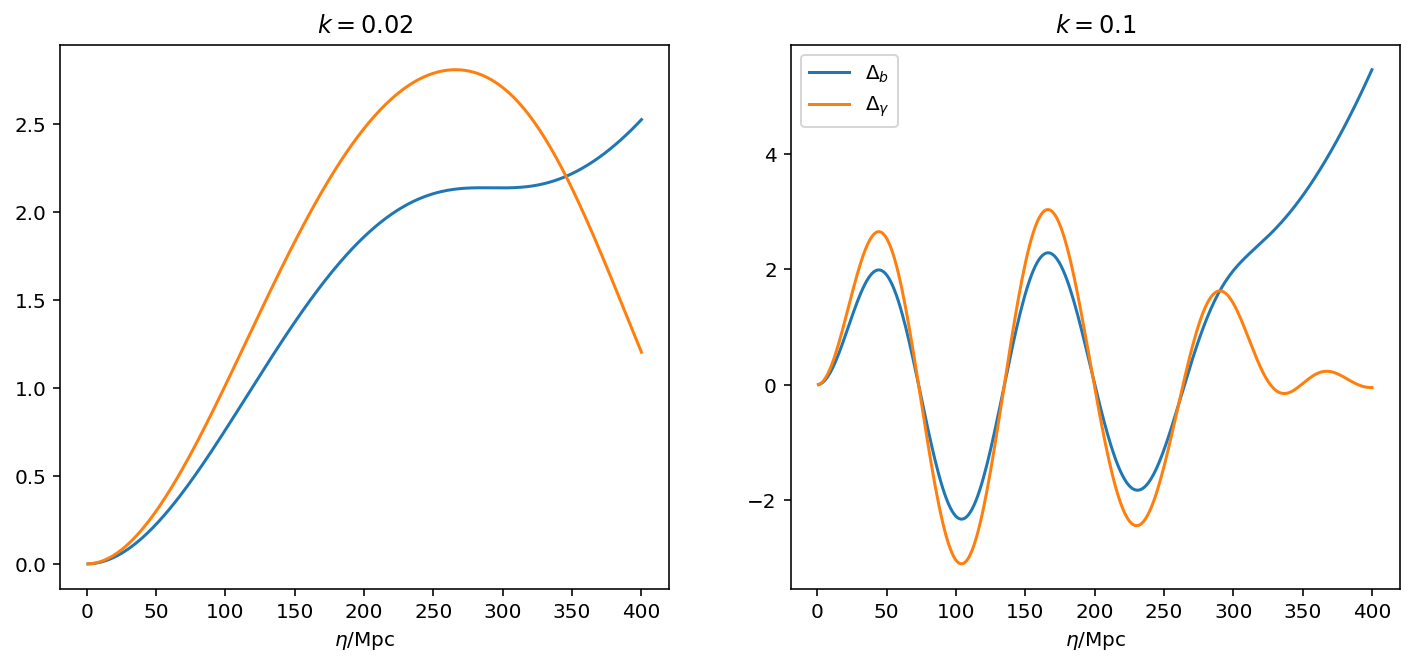

In [27]:
eta = np.linspace(1, 400, 300)
ks = [0.02,0.1]
ev = data.get_time_evolution(ks, eta, ['delta_baryon','delta_photon'])
_, axs= plt.subplots(1,2, figsize=(12,5))
for i, ax in enumerate(axs):
    ax.plot(eta,ev[i,:, 0])
    ax.plot(eta,ev[i,:, 1])
    ax.set_title('$k= %s$'%ks[i])
    ax.set_xlabel(r'$\eta/\rm{Mpc}$');
plt.legend([r'$\Delta_b$', r'$\Delta_\gamma$'], loc = 'upper left');


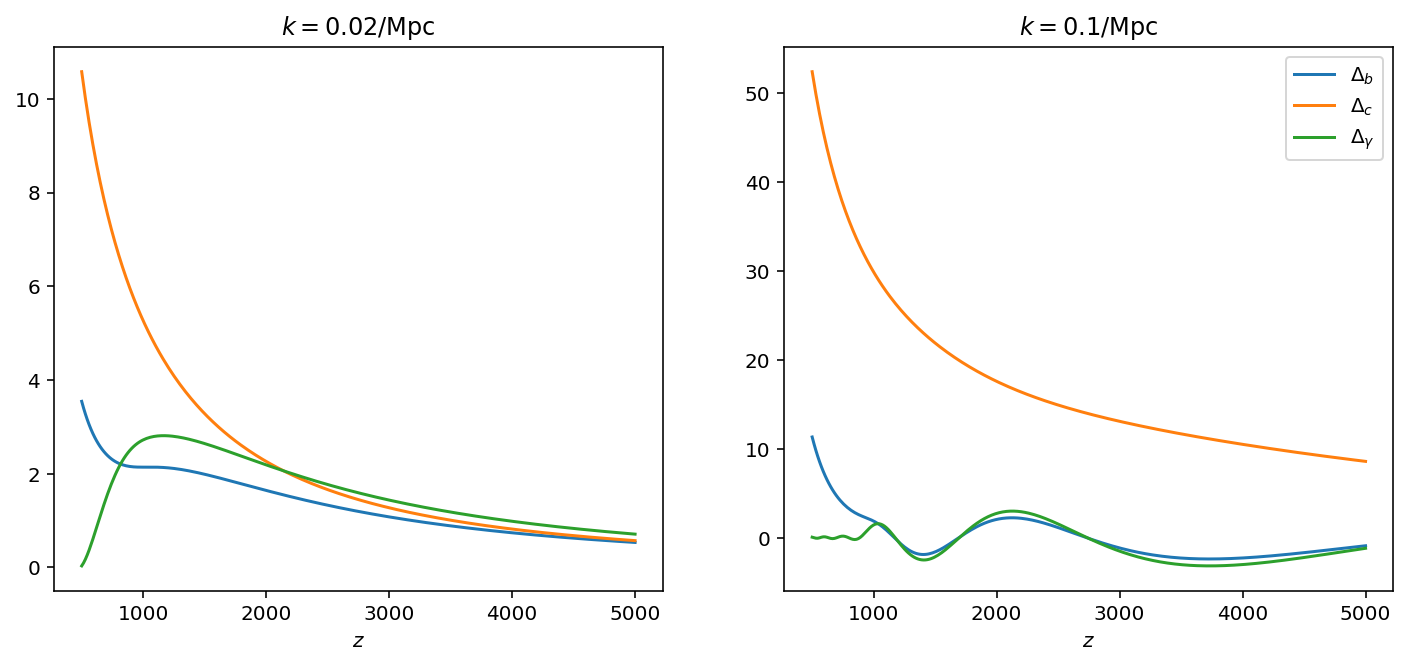

In [28]:
#or as a function of redshift
z = np.linspace(500,5000,300)
ks = [0.02,0.1]
ev = data.get_redshift_evolution(ks, z, ['delta_baryon','delta_cdm', 'delta_photon'])
_, axs= plt.subplots(1,2, figsize=(12,5))
for i, ax in enumerate(axs):
    ax.plot(z,ev[i,:, 0])
    ax.plot(z,ev[i,:, 1])
    ax.plot(z,ev[i,:, 2])
    ax.set_title(r'$k= %s/\rm{Mpc}$'%ks[i])
    ax.set_xlabel('$z$');
plt.legend([r'$\Delta_b$', r'$\Delta_c$', r'$\Delta_\gamma$'], loc = 'upper right');

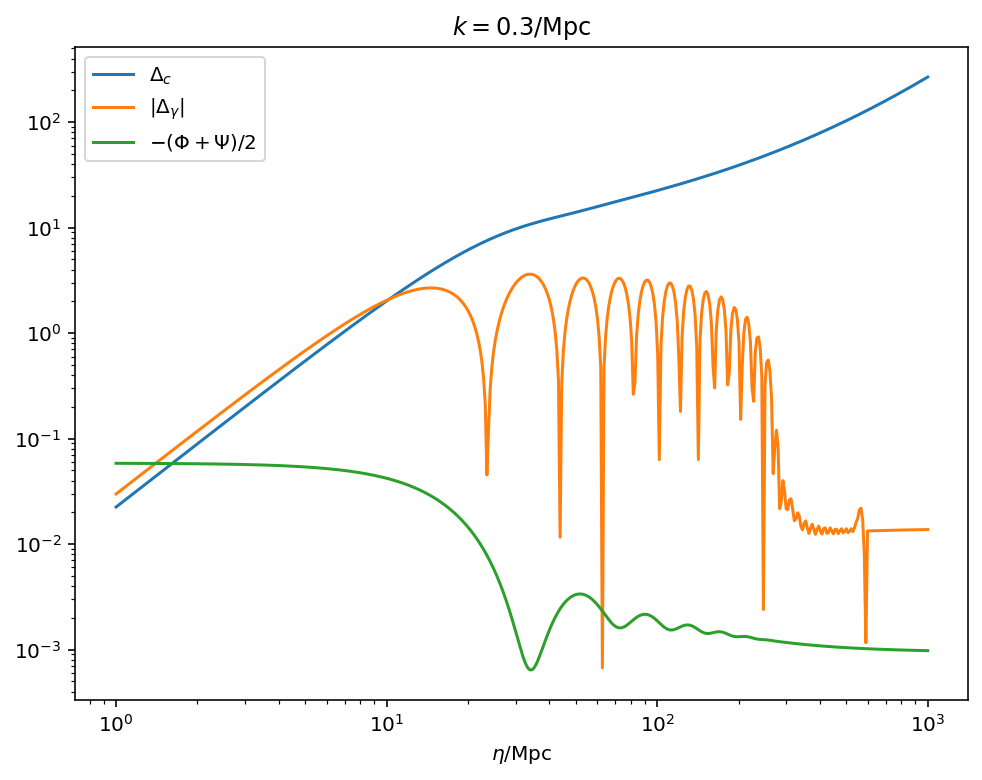

In [29]:
#Here you can see oscillation of delta_photon, subsequent decay of the potential and change to Mezsaroz growth in delta_cdm
eta = 10**(np.linspace(0, 3, 500))
def plot_ev(ev, k):
    plt.figure(figsize=(8,6))
    plt.loglog(eta,ev[:,0])
    plt.loglog(eta,np.abs(ev[:,1]))
    plt.loglog(eta,-ev[:,2])
    plt.title(r'$k= %s/\rm{Mpc}$'%k)
    plt.xlabel(r'$\eta/\rm{Mpc}$');
    plt.legend([r'$\Delta_c$', r'$|\Delta_\gamma|$', r'$-(\Phi+\Psi)/2$'], loc = 'upper left');

k=0.3
plot_ev(data.get_time_evolution(k, eta, ['delta_cdm','delta_photon', 'Weyl']),k)


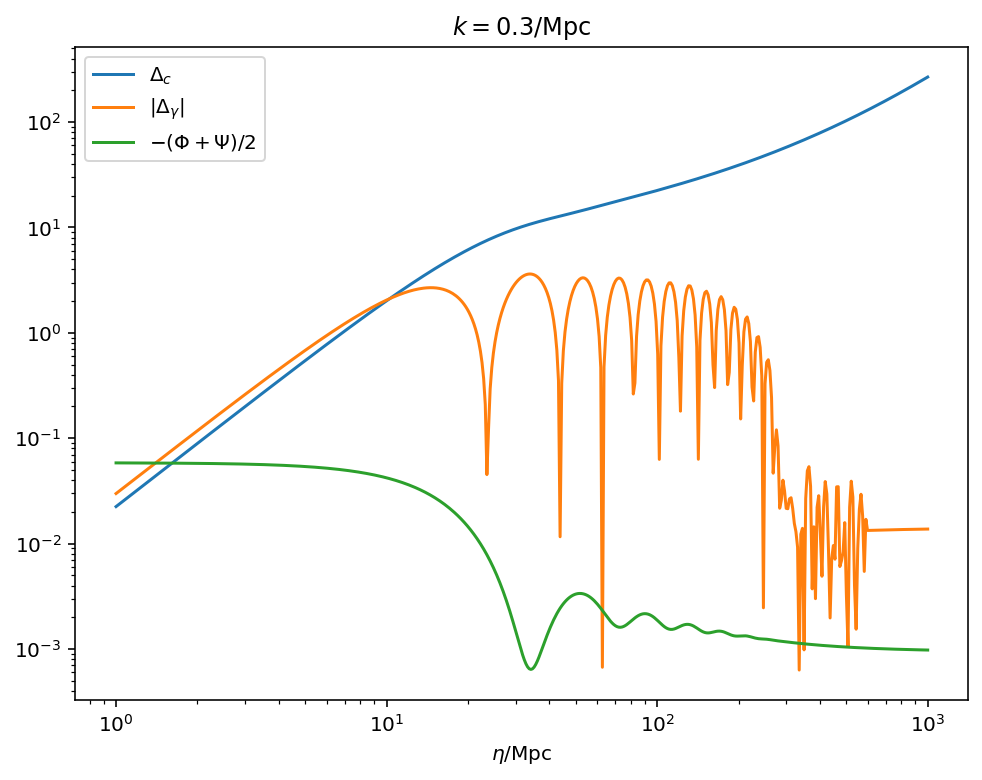

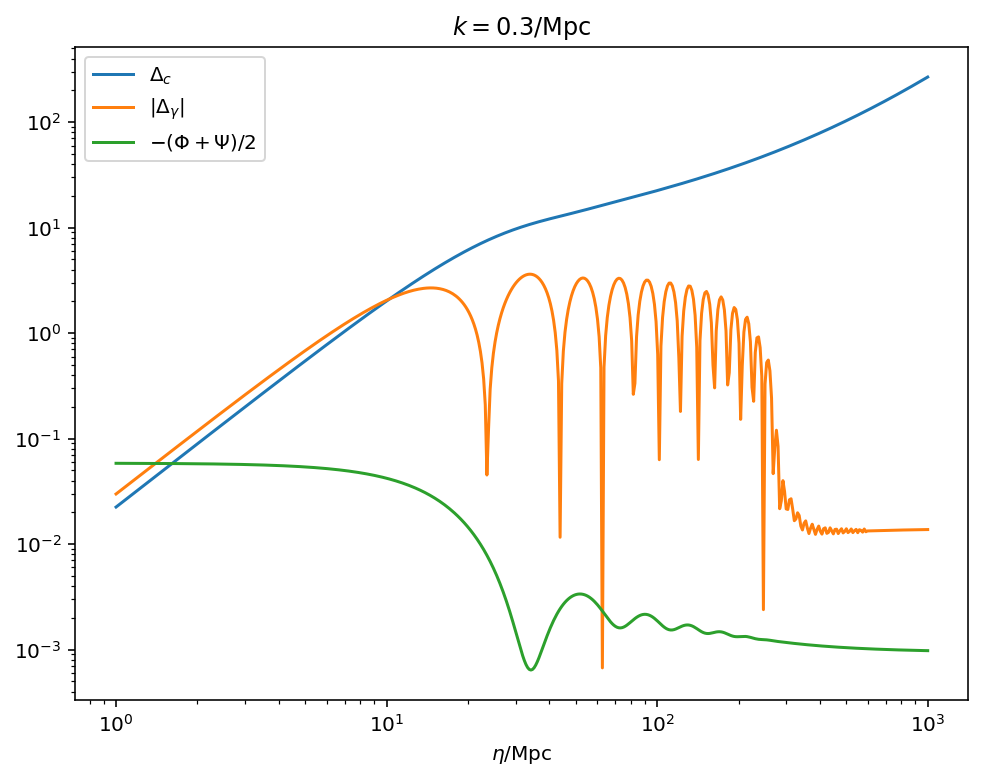

In [30]:
#Note that time evolution can be visually quite sensitive to accuracy. By default it is boosted, but you can change this. e.g.
plot_ev(data.get_time_evolution(k, eta, ['delta_cdm','delta_photon', 'Weyl'],lAccuracyBoost=1),k)
plot_ev(data.get_time_evolution(k, eta, ['delta_cdm','delta_photon', 'Weyl'],lAccuracyBoost=10),k)

Now do integral to get convergence power spectrum, using Limber approximation ($k\approx (l+0.5)/\chi$)
$$
C_l^\kappa \approx  [l(l+1)]^2\int_0^{\chi_*} d\chi \left( \frac{\chi_*-\chi}{\chi^2\chi_*}\right)^2 P_\Psi\left(\frac{l+0.5}{\chi}, z(\chi)\right)
$$
where $P_\Psi $ is obtained from the interpolator.

In [33]:
#Get lensing window function (flat universe)
win = ((chistar-chis)/(chis**2*chistar))**2
#Do integral over chi
ls = np.arange(2,2500+1, dtype=np.float64)
cl_kappa=np.zeros(ls.shape)
w = np.ones(chis.shape) #this is just used to set to zero k values out of range of interpolation
for i, l in enumerate(ls):
    k=(l+0.5)/chis
    w[:]=1
    w[k<1e-4]=0
    w[k>=kmax]=0
    cl_kappa[i] = np.dot(dchis, w*PK.P(zs, k, grid=False)*win/k**4)
cl_kappa*= (ls*(ls+1))**2

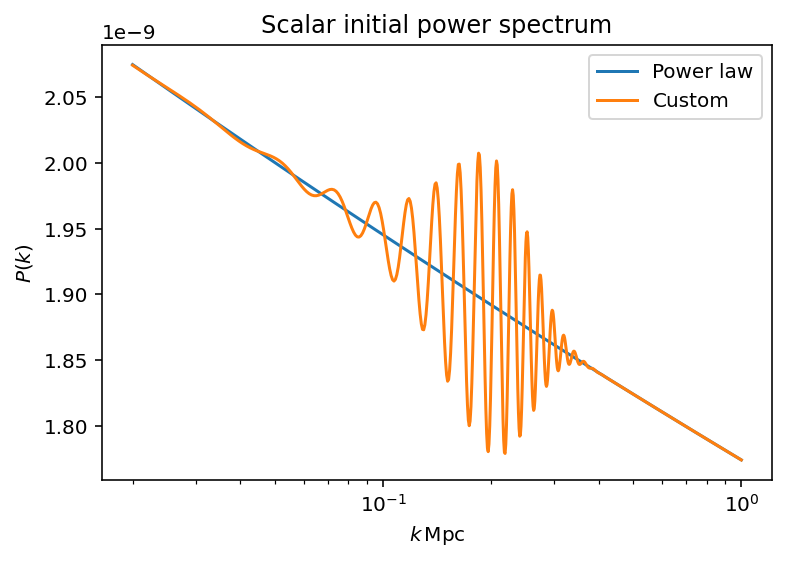

In [43]:
#Let's look at some non-standard primordial power spectrum, e.g. with wavepacket oscillation

#Define our custom  power spectrum function (here power law with one wavepacket)
def PK(k, As, ns, amp, freq, wid, centre, phase):
    return As*(k/0.05)**(ns-1)*(1+ np.sin(phase+k*freq)*amp*np.exp(-(k-centre)**2/wid**2))

#Check how this looks compared to power law
ks = np.linspace(0.02,1,1000)
pk1 = 2e-9*(ks/0.05)**(0.96-1)
pk2 = PK(ks,2e-9, 0.96,0.0599, 280, 0.08, 0.2,0)
plt.semilogx(ks,pk1)
plt.semilogx(ks,pk2)
plt.ylabel('$P(k)$')
plt.xlabel(r'$k\, {\rm Mpc}$')
plt.legend(['Power law','Custom'])
plt.title('Scalar initial power spectrum');

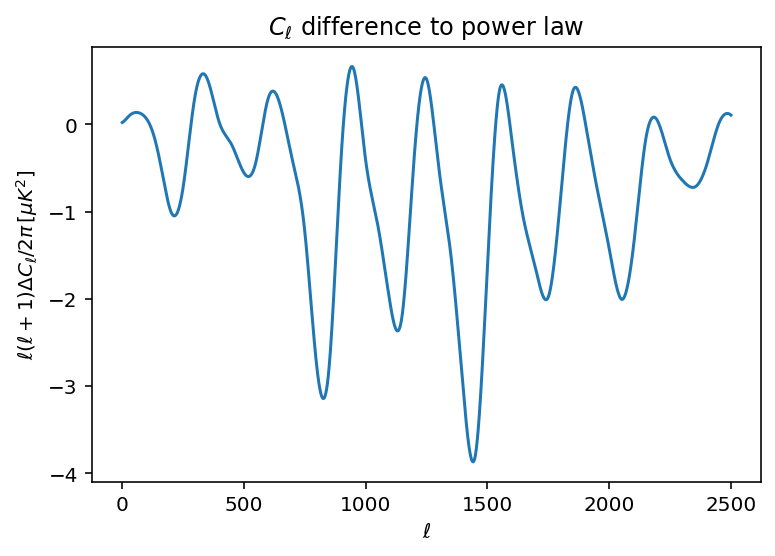

In [44]:
#Now compute C_l and compare
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, tau=0.06)
lmax=2500
pars.set_for_lmax(lmax,lens_potential_accuracy=1)

#For comparison, standard power law
pars.InitPower.set_params(As=2e-9, ns=0.96)
results = camb.get_results(pars)
cl_unlensed=results.get_unlensed_scalar_cls(CMB_unit ='muK')
cl=results.get_lensed_scalar_cls(CMB_unit ='muK')

#Now get custom spectrum (effective_ns_for_nonlinear is used for halofit if required)
pars.set_initial_power_function(PK, args=(2e-9, 0.96,0.0599, 280, 0.08, 0.2,0), 
                                effective_ns_for_nonlinear=0.96)

results2 = camb.get_results(pars)
cl2=results2.get_lensed_scalar_cls(CMB_unit ='muK')

ls = np.arange(2,lmax)
plt.plot(ls,(cl2[2:lmax,0]-cl[2:lmax,0]))
plt.xlabel(r'$\ell$');
plt.ylabel(r'$\ell(\ell+1)\Delta C_\ell/2\pi\, [\mu K^2]$')
plt.title(r'$C_\ell$ difference to power law');

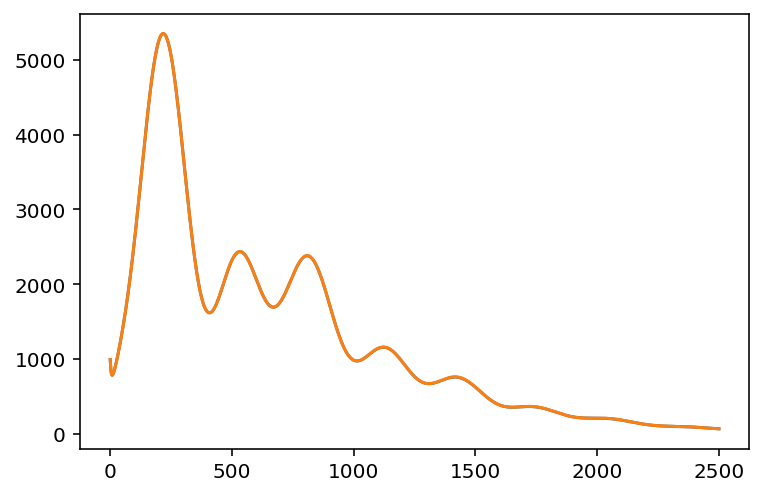

In [45]:
plt.plot(ls,cl2[2:lmax,0])
plt.plot(ls,cl[2:lmax,0])

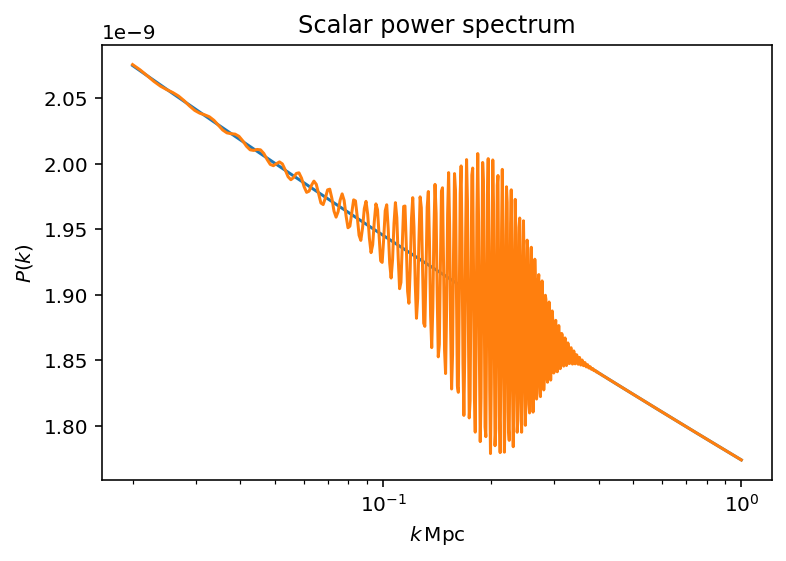

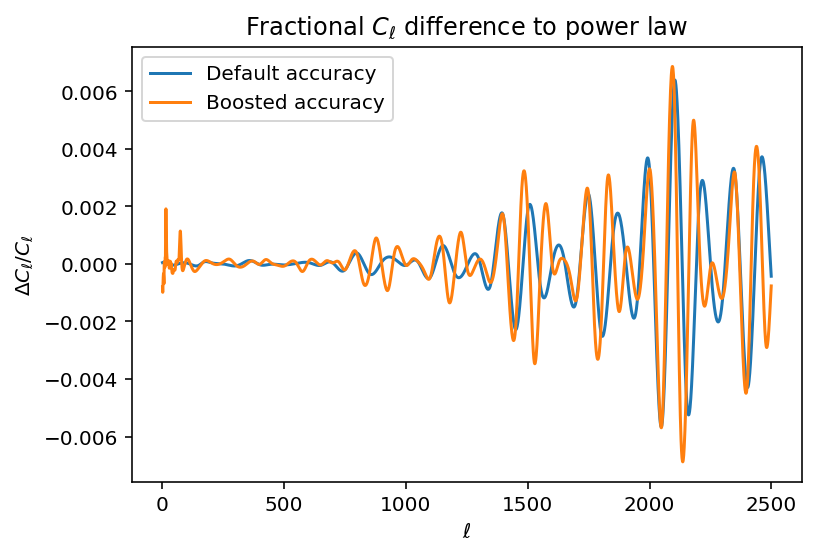

In [46]:
#Note that if you have sharp features or fine oscillations, you may need 
#increase accuracy to sample them well. e.g. let's try increasing the frequency

#Default accuracy
pars.Accuracy.lSampleBoost = 1
pars.Accuracy.IntkAccuracyBoost =1
pars.Accuracy.SourcekAccuracyBoost =1

freq = 1000
ks = np.linspace(0.02,1,1000)
pk1 = 2e-9*(ks/0.05)**(0.96-1)
pk2 = PK(ks,2e-9, 0.96,0.0599,freq, 0.08, 0.2,0)
plt.semilogx(ks,pk1)
plt.semilogx(ks,pk2)
plt.ylabel('$P(k)$')
plt.xlabel(r'$k\, {\rm Mpc}$');
plt.title('Scalar power spectrum')
plt.figure()

pars.set_initial_power_function(PK, args=(2e-9, 0.96,0.0599, freq, 0.08, 0.2,0),
                               effective_ns_for_nonlinear=0.96)

results2 = camb.get_results(pars)
cl_unlensed2=results2.get_unlensed_scalar_cls(CMB_unit ='muK')

#need to increase default sampling in ell to see features smaller than peaks reliably
pars.Accuracy.lSampleBoost = 2
#may also need to sample k more densely when computing C_l from P(k)
pars.Accuracy.IntkAccuracyBoost = 2 

results3 = camb.get_results(pars)
cl_unlensed3=results3.get_unlensed_scalar_cls(CMB_unit ='muK')
cl3=results3.get_lensed_scalar_cls(CMB_unit ='muK')

ls = np.arange(2,lmax)
plt.plot(ls,(cl_unlensed2[2:lmax,0]/cl_unlensed[2:lmax,0]-1))
plt.plot(ls,(cl_unlensed3[2:lmax,0]/cl_unlensed[2:lmax,0]-1))

plt.xlabel(r'$\ell$')
plt.ylabel(r'$\Delta C_\ell/C_\ell$')
plt.title(r'Fractional $C_\ell$ difference to power law')
plt.legend(['Default accuracy','Boosted accuracy']);


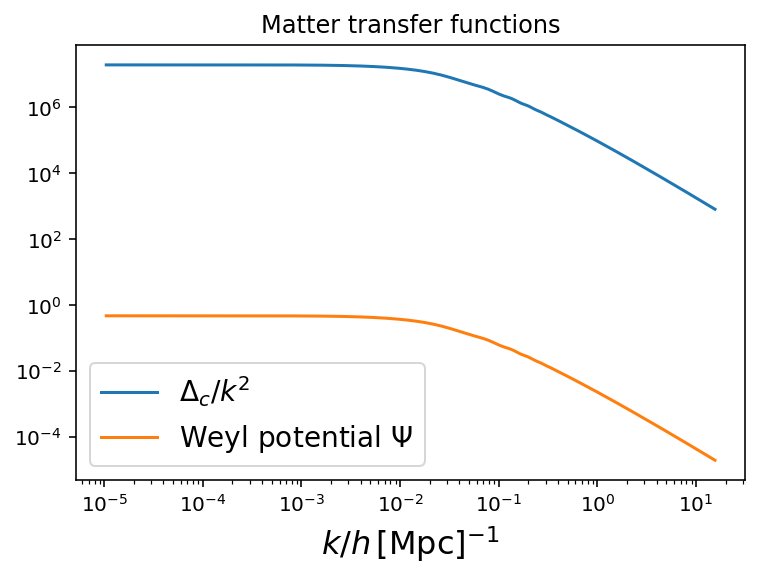

In [49]:
#You can also get the matter transfer functions
#These are synchronous gauge and normalized to unit primordial curvature perturbation
#The values stored in the array are quantities like Delta_x/k^2, and hence
#are nearly independent of k on large scales. 
#Indices in the transfer_data array are the variable type, the k index, and the redshift index

pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
pars.InitPower.set_params(ns=0.965)
pars.set_matter_power(redshifts=[0], kmax=kmax)
results= camb.get_results(pars)

trans = results.get_matter_transfer_data()
#get kh - the values of k/h at which they are calculated
kh = trans.transfer_data[0,:,0]
#transfer functions for different variables, e.g. CDM density and the Weyl potential
#CDM perturbations have grown, Weyl is O(1) of primordial value on large scales
delta = trans.transfer_data[model.Transfer_cdm-1,:,0]
W = trans.transfer_data[model.Transfer_Weyl-1,:,0]
plt.plot(kh,delta)
plt.loglog(kh,-W)
plt.xlabel(r'$k/h\, [\rm Mpc]^{-1}$', fontsize=16);
plt.title('Matter transfer functions')
plt.legend([r'$\Delta_c/k^2$',r'Weyl potential $\Psi$'], fontsize=14);

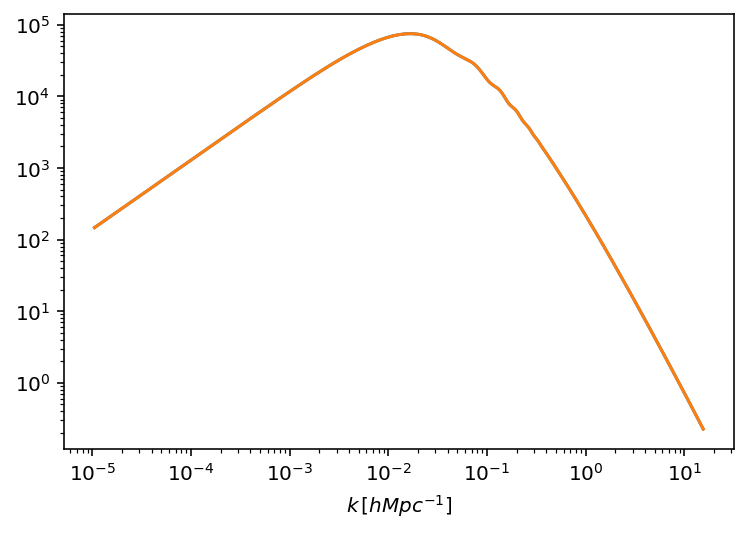

In [50]:
#Check we can get the matter power spectrum from the transfer function as expected
k = kh*results.Params.h
transfer = trans.transfer_data[model.Transfer_tot-1,:,0]
primordial_PK = results.Params.scalar_power(k)
matter_power = primordial_PK*transfer**2*k**4 / (k**3/(2*np.pi**2))

#compare with CAMB's explicit output for the matter power spectrum
kh2,zs,PK = results.get_linear_matter_power_spectrum(hubble_units=False)

plt.loglog(kh,matter_power)
plt.loglog(kh, PK[0,:]);
plt.xlabel(r'$k\, [h Mpc^{-1}]$');

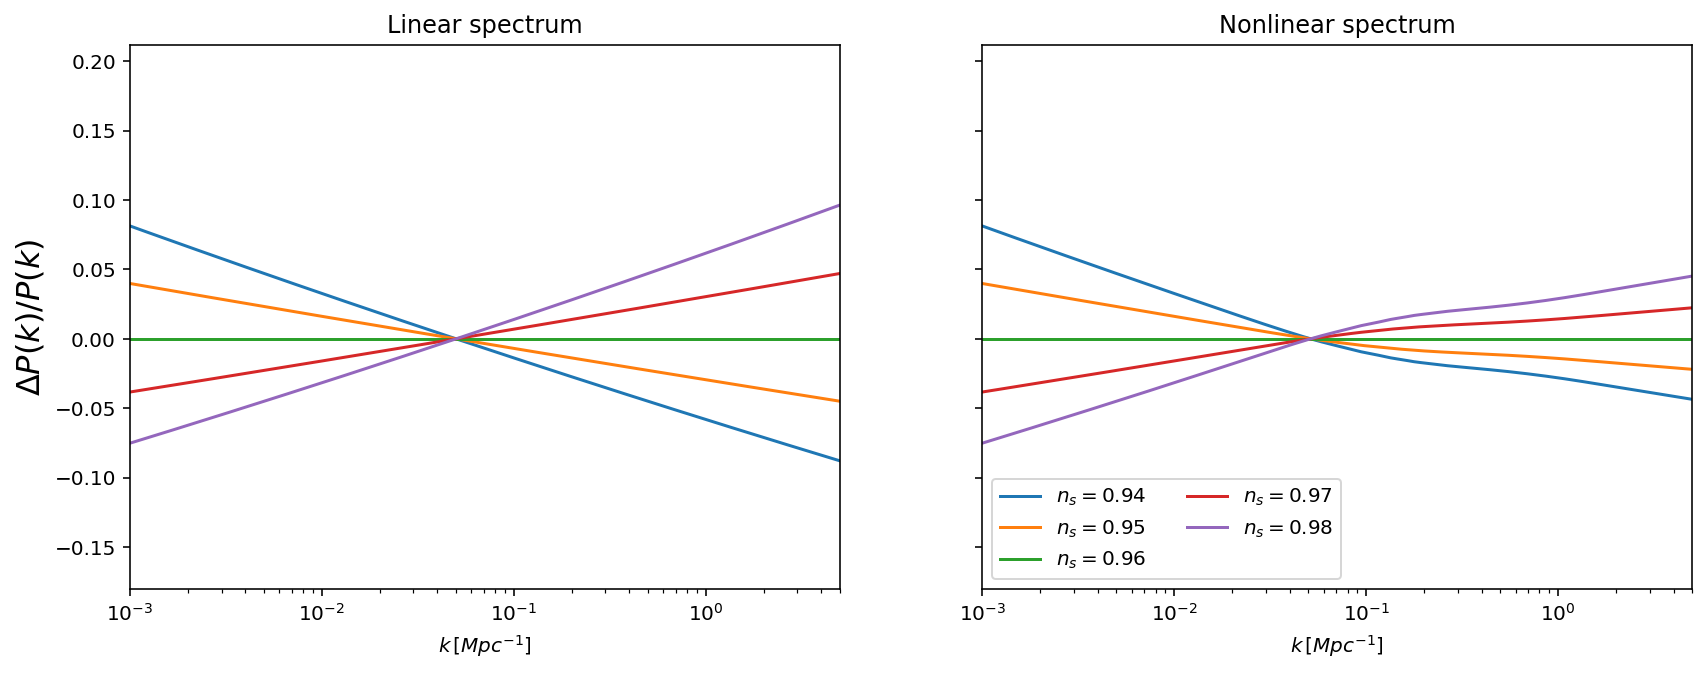

In [51]:
# results for power spectra using different initial power spectra 
# can be computed without  recomputing the transfer functions

pars = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, redshifts=[0], kmax=5, 
                       As=2e-9, ns=0.96, halofit_version='mead')
results= camb.get_transfer_functions(pars)
kref,_,PKref = results.get_linear_matter_power_spectrum(hubble_units=False, k_hunit=False)
kref,_,PKnl = results.get_nonlinear_matter_power_spectrum(hubble_units=False, k_hunit=False)

ns_arr = np.arange(0.94, 0.981, 0.01)
fig, axs = plt.subplots(1,2, figsize=(14,5), sharey=True)

for ns in ns_arr:
    results.Params.InitPower.set_params(As=2e-9, ns=ns)
    results.calc_power_spectra()
    k,_,PK = results.get_linear_matter_power_spectrum(hubble_units=False, k_hunit=False)
    np.testing.assert_allclose(k,kref)
    axs[0].semilogx(k, PK[0,:]/PKref[0,:]-1);
    k,_,PK = results.get_nonlinear_matter_power_spectrum(hubble_units=False, k_hunit=False)
    axs[1].semilogx(k, PK[0,:]/PKnl[0,:]-1);

for ax, t in zip(axs,['Linear', 'Nonlinear']):
    ax.set_title('%s spectrum'%t)
    ax.set_xlim(1e-3,5)
    #ax.set_ylim([-0.1,0.1])
    ax.set_xlabel(r'$k\, [Mpc^{-1}]$');
plt.legend(['$n_s = %.2f$'%ns for ns in ns_arr], ncol=2, loc='lower left');
axs[0].set_ylabel(r'$\Delta P(k)/P(k)$', fontsize=16);